In [1]:
# Aditya Bhalerao
# BE-A   09

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [3]:
df = pd.read_csv('../data/sales.csv',encoding='latin1')

In [4]:
df.shape

(2823, 25)

In [5]:
df.head(3)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium


In [6]:
df.tail(3)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [8]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [9]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [10]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

# Cleaning

In [11]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [12]:
df_drop  = ['ADDRESSLINE1', 'ADDRESSLINE2', 'STATUS','POSTALCODE', 'CITY', 
            'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER', 'ORDERDATE']
df.drop(df_drop, axis=1, inplace = True)
df.drop(['COUNTRY'], axis = 1, inplace = True)

Dropped these columns because they are irrelevant for the analysis

In [13]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col, df[col].nunique())

PRODUCTLINE 7
PRODUCTCODE 109
DEALSIZE 3


In [14]:
df.dtypes

QUANTITYORDERED      int64
PRICEEACH          float64
ORDERLINENUMBER      int64
SALES              float64
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE         object
MSRP                 int64
PRODUCTCODE         object
DEALSIZE            object
dtype: object

In [15]:
productline = pd.get_dummies(df['PRODUCTLINE'])  # one-hot encoding
dealsize = pd.get_dummies(df['DEALSIZE'])  # one-hot encoding

df = pd.concat([df, productline, dealsize], axis = 1)

df = df.drop(['PRODUCTLINE','DEALSIZE'], axis=1)

Above code is performing one-hot encoding on categorical columns ('PRODUCTLINE' and 'DEALSIZE') and then concatenating the resulting one-hot encoded columns to the DataFrame df. 

In [16]:
df['PRODUCTCODE'] = pd.Categorical(df['PRODUCTCODE']).codes

The above code is converting the 'PRODUCTCODE' column in the DataFrame df into numerical codes using Pandas.

In [17]:
df.dtypes

QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
MSRP                  int64
PRODUCTCODE            int8
Classic Cars           bool
Motorcycles            bool
Planes                 bool
Ships                  bool
Trains                 bool
Trucks and Buses       bool
Vintage Cars           bool
Large                  bool
Medium                 bool
Small                  bool
dtype: object

Transformed all the data types of the columns in the DataFrame into numerical values.

# Plotting Elbow Plot to determine the number of clusters

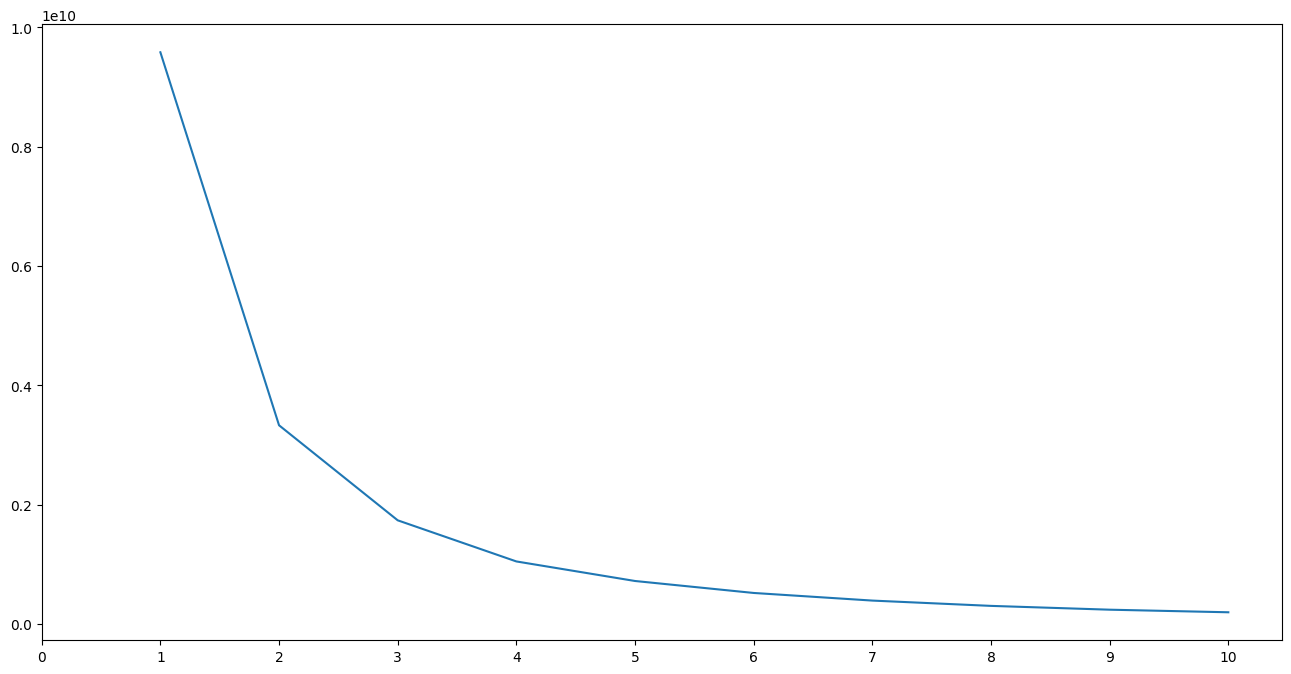

In [18]:
inertia = []

for k in range(1, 11):
    clusters = KMeans(n_clusters=k, init='k-means++', random_state=42)  # KMeans Model
    clusters.fit(df)  # Training KMeans Model
    inertia.append(clusters.inertia_)
    
plt.figure(figsize=(16,8))
sns.lineplot(x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], y = inertia)
plt.xticks([i for i in range(0, 11)])
plt.show()

Observation: 
A Elbow can be observed at 3 and after that the curve decreases gradually.<br>
Therefore, k = 3 

In [19]:
k = 3

In [20]:
kmeans = KMeans(n_clusters = k, random_state = 42)  # KMeans Model
y_kmeans = kmeans.fit_predict(df)  # Training KMeans Model
y_kmeans

array([0, 0, 1, ..., 1, 0, 0], dtype=int32)

In [21]:
unique, counts = np.unique(y_kmeans, return_counts=True)
counts = counts.reshape(1,3)
counts_df = pd.DataFrame(counts, columns=['Cluster1','Cluster2','Cluster3'])

counts_df

,Cluster1,Cluster2,Cluster3
0,1367,1083,373


Count of datapoints in each cluster

In [22]:
kmeans.cluster_centers_  # coordinates of cluster centers

array([[ 3.08302853e+01,  7.00755230e+01,  6.67300658e+00,
         2.12409474e+03,  2.71762985e+00,  7.09509876e+00,
         2.00381127e+03,  7.84784199e+01,  6.24871982e+01,
         2.64813460e-01,  1.21433797e-01,  1.29480614e-01,
         1.00219459e-01,  3.87710315e-02,  9.21726408e-02,
         2.53108998e-01,  2.08166817e-17,  6.21799561e-02,
         9.37820044e-01],
       [ 3.72031394e+01,  9.52120960e+01,  6.44967682e+00,
         4.13868425e+03,  2.72022161e+00,  7.09879963e+00,
         2.00379409e+03,  1.13248384e+02,  5.04469067e+01,
         3.74884580e-01,  1.15420129e-01,  9.41828255e-02,
         8.21791320e-02,  1.84672207e-02,  1.16343490e-01,
         1.98522622e-01,  2.08166817e-17,  1.00000000e+00,
        -6.66133815e-16],
       [ 4.45871314e+01,  9.98931099e+01,  5.75603217e+00,
         7.09596863e+03,  2.71045576e+00,  7.06434316e+00,
         2.00389008e+03,  1.45823056e+02,  3.14959786e+01,
         5.33512064e-01,  1.07238606e-01,  7.23860590e-02,
    

kmeans.cluster_centers_ represents the coordinates of the cluster centers in the feature space. <br>
These cluster centers are the centroids of the clusters that the K-means algorithm has identified.

# PCA

In [23]:
pca = PCA(n_components=2)

The provided code initializes a Principal Component Analysis (PCA) object with n_components set to 2.

In [24]:
reduced_X = pd.DataFrame(pca.fit_transform(df), columns=['PCA1','PCA2'])  # Reducing dataset

In [25]:
reduced_X.head()

,PCA1,PCA2
0,-682.488323,-42.819535
1,-787.665502,-41.694991
2,330.732170,-26.481208
3,193.040232,-26.285766
4,1651.532874,-6.891196


This code applies Principal Component Analysis (PCA) to reduce the dimensionality of the DataFrame df to two principal components (PCA1 and PCA2) and stores the result in a new DataFrame called reduced_X.

In [26]:
reduced_centers = pca.transform(kmeans.cluster_centers_)  # Reducing centers
reduced_centers

array([[-1.43005891e+03,  2.60041009e+00],
       [ 5.84994044e+02, -4.36786931e+00],
       [ 3.54247180e+03,  3.15185487e+00]])

As the dataset was reduced using PCA, it's necessary to apply the same dimensionality reduction technique to the cluster centers for consistency.

# Visualization

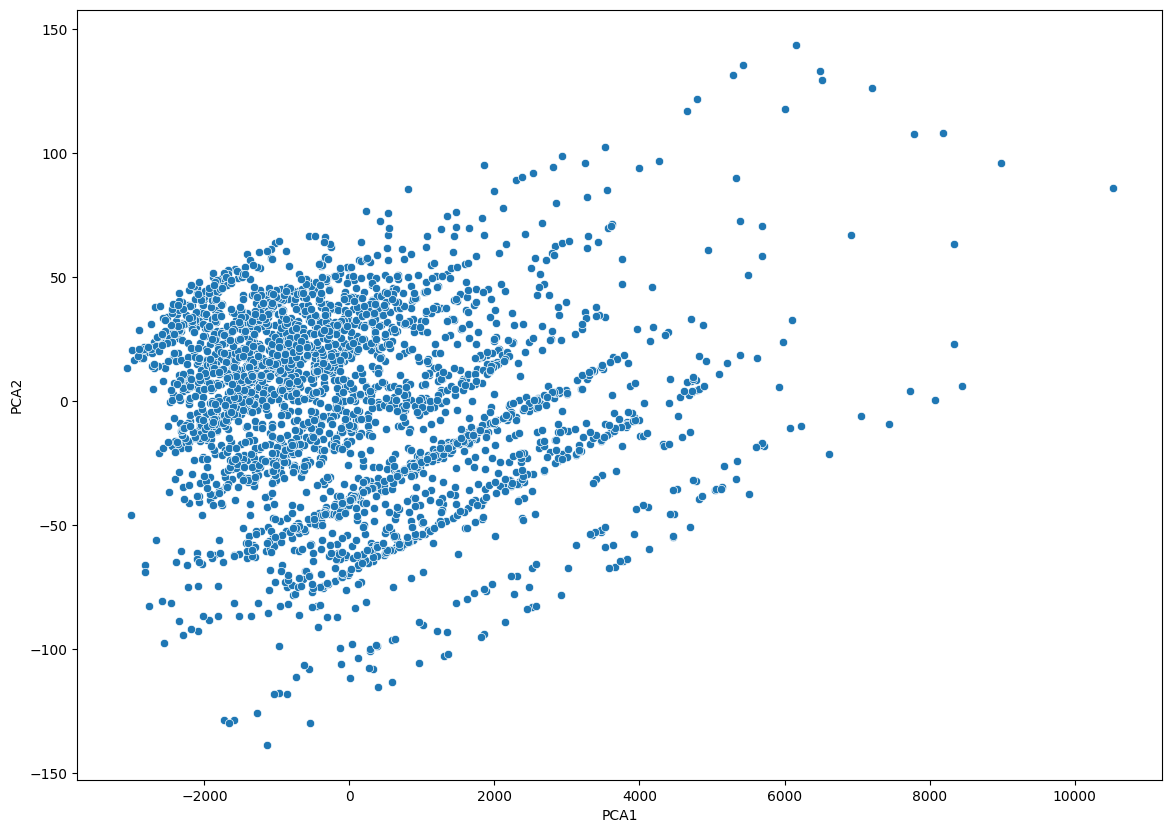

In [27]:
plt.figure(figsize=(14,10))
sns.scatterplot(x = reduced_X['PCA1'], y = reduced_X['PCA2'], palette="dark")
plt.show()

Plotting all the data points present in the dataset

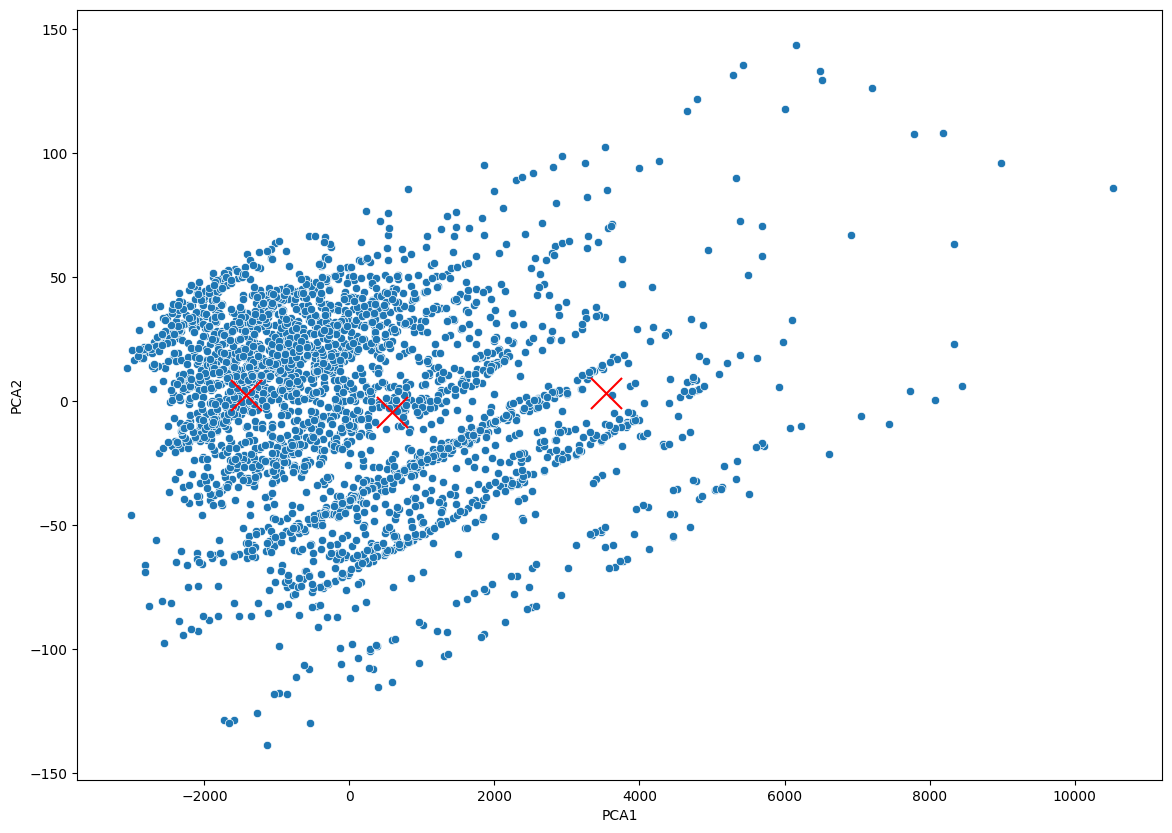

In [28]:
plt.figure(figsize=(14,10))
sns.scatterplot(x = reduced_X['PCA1'], y = reduced_X['PCA2'], palette="dark")
plt.scatter(reduced_centers[:,0], reduced_centers[:,1], color='red', marker='x', s=500)
plt.show()

Plotting Cluster Centers

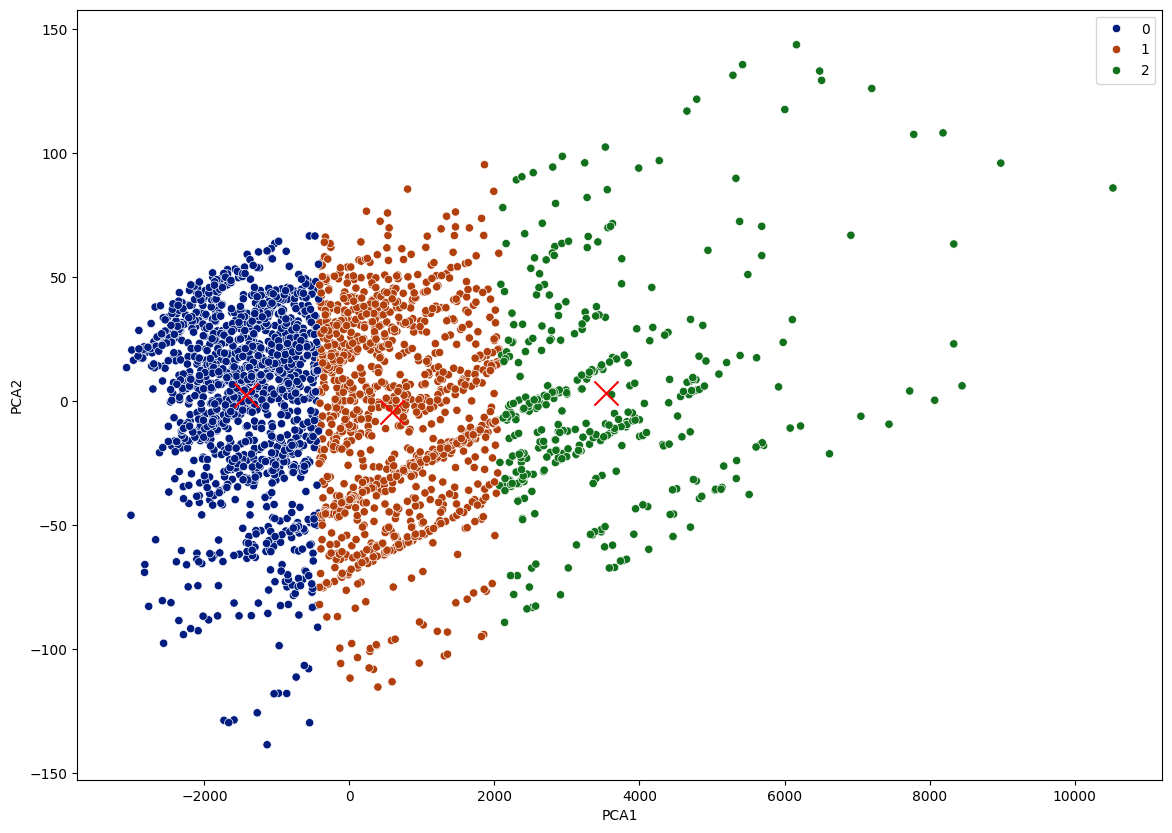

In [29]:
plt.figure(figsize=(14,10))
sns.scatterplot(x = reduced_X['PCA1'], y = reduced_X['PCA2'], hue=y_kmeans, palette="dark")
plt.scatter(reduced_centers[:,0], reduced_centers[:,1], color='red', marker='x', s=300)
plt.show()

Representing the clusters using different colours.